In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_customers=pd.read_csv('Mall_Customers.csv')


In [4]:
df_customers.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
139,140,Female,35,74,72
21,22,Male,25,24,73
192,193,Male,33,113,8
13,14,Female,24,20,77
123,124,Male,39,69,91


In [5]:
df_customers.shape

(200, 5)

In [6]:
df_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df_customers.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df_customers['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

In [10]:
df_customers['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

In [9]:
df_customers['Annual Income (k$)']=(df_customers['Annual Income (k$)']-np.mean(df_customers['Annual Income (k$)'])) / np.std(df_customers['Annual Income (k$)'])

In [11]:
df_customers['Spending Score (1-100)']=(df_customers['Spending Score (1-100)']-np.mean(df_customers['Spending Score (1-100)']))/np.std(df_customers['Spending Score (1-100)'])

In [12]:
df_customers.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
31,32,Female,21,-1.166458,0.885132
74,75,Male,59,-0.250391,-0.124229
96,97,Female,47,-0.021375,-0.124229
10,11,Male,67,-1.586321,-1.405340
5,6,Female,22,-1.662660,1.001596


In [14]:
df_target=df_customers.drop(['CustomerID','Gender','Age'],axis=1)
df_target.sample(5)

,Annual Income (k$),Spending Score (1-100)
131,0.398489,0.962775
165,0.932861,0.962775
2,-1.700830,-1.715913
198,2.917671,-1.250054
140,0.551167,-1.754735


In [15]:
wccs=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i,init='k-means++',random_state=42)
    k_means.fit(df_target)
    
    wccs.append(k_means.inertia_)



C:\Users\RAZIN KARIMI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RAZIN KARIMI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RAZIN KARIMI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\RAZIN KARIMI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to 

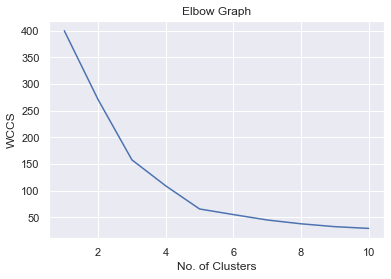

In [18]:
sns.set()
plt.plot(range(1,11),wccs)
plt.title("Elbow Graph")
plt.xlabel("No. of Clusters")
plt.ylabel("WCCS")
plt.show()

In [20]:
k_means=KMeans(n_clusters=5,init='k-means++',random_state=40)
y=k_means.fit_predict(df_target)
print(y)

C:\Users\RAZIN KARIMI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 4 3 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 1 2 4 2 1 2 1 2 4 2 1 2 1 2 1 2 1 2 4 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


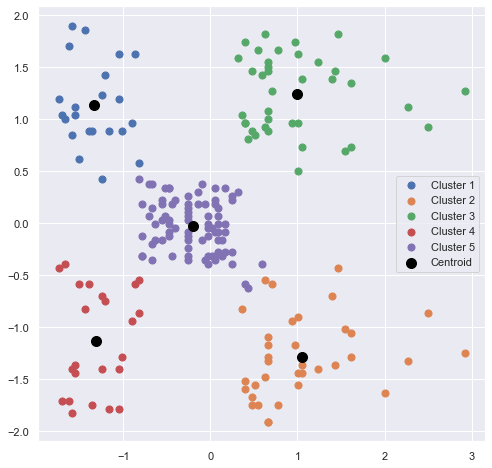

In [28]:
plt.figure(figsize=(8, 8))

for cluster_id in range(5):
    cluster_points = df_target.loc[y == cluster_id]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], s=50, label=f'Cluster {cluster_id + 1}')

plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s=100, c='black', label='Centroid')
plt.legend()
plt.show()